In [34]:
#读取前两列
import networkx as nx
import pandas as pd
import numpy  as np
import igraph as ig
import leidenalg as la
data = pd.read_csv('/Users/zhusx/Downloads/Leiden算法数据/Leiden算法数据/email.edgelist.txt',delimiter='\t',header=None)
data = data.iloc[1:,:2]
data.columns = ['src','dst']
data

,src,dst
1,1,1
2,1,63
3,1,144
4,1,196
5,1,384
...,...,...
103726,57187,943
103727,57188,13376
103728,57189,1266
103729,57190,1315


In [46]:
# 创建一个igraph的空图
g = ig.Graph()
da = data[['src','dst']].values
# 边构建
edges = []
for num in range(len(da)):    
    edges.append((da[num,0],da[num,1]))
# 节点构建
nodes = set(data['src'].astype('str').tolist()+data['dst'].astype('str').tolist())
for node in nodes:    
    g.add_vertex(node)    
g.add_edges(edges)

In [47]:
# 计算社区分配
partition = la.find_partition(g,la.ModularityVertexPartition)

In [48]:
# 创建一个新的DataFrame来存储节点Label及其模块化社区编号
com = pd.DataFrame({"group_id": g.vs['name'],
                    "Community": partition.membership})
com.head()

,group_id,Community
0,13182,2
1,52900,1
2,30717,1
3,46001,38
4,53647,70


In [53]:
# 统计每个群组人数
com.groupby('group_id').count().sort_values(by='Community', ascending=False).head(120)
# 也可以提取子图看看
sub_g = partition.subgraph(112)
sub_g.vcount()

6

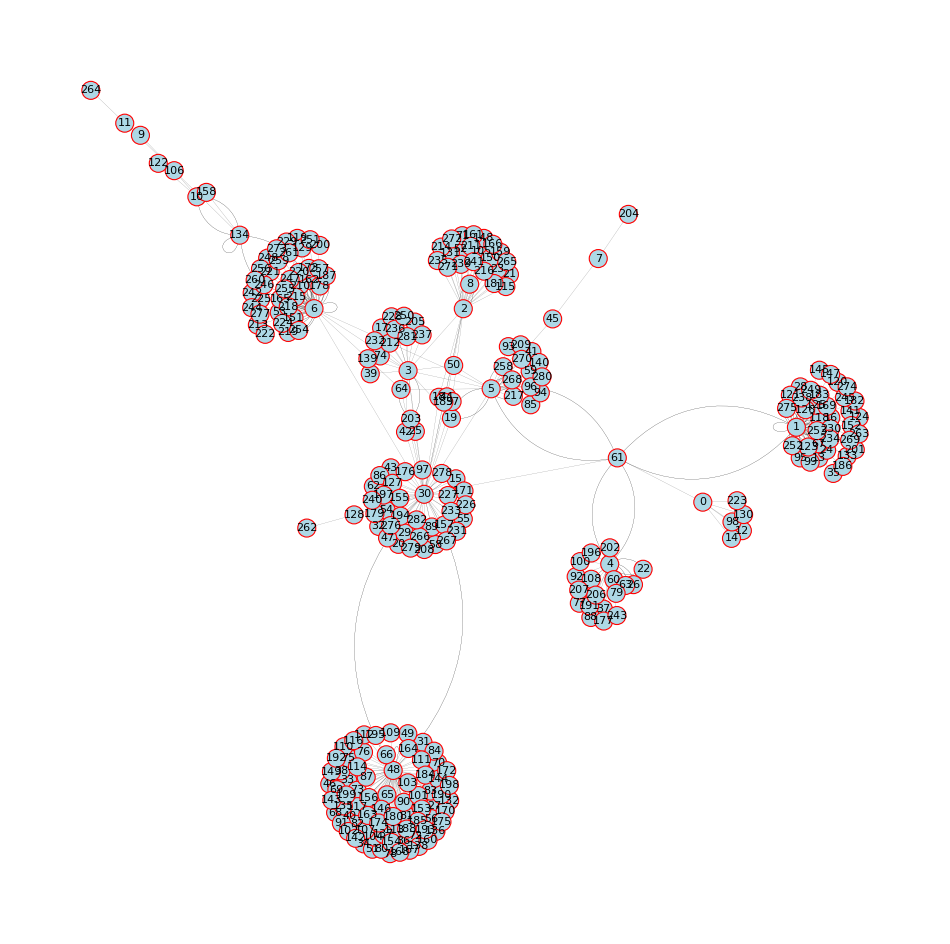

In [54]:
import igraph as ig
import matplotlib.pyplot as plt
sub_g = partition.subgraph(73)
fig, ax = plt.subplots(figsize=(12, 12))
ig.plot(sub_g,
        #bbox=(500, 500),
        target = ax,
        vertex_color="lightblue",
        vertex_shape='circle',
        vertex_frame_color='red',
        vertex_frame_width=0.8,
        vertex_label=range(sub_g.vcount()),
        vertex_label_size = 8,
        #edge_color='gray',
        edge_width = 0.1,
        layout_kamada_kawai='kk',
        vertex_size=18
)